In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd
from sklearn.cluster import KMeans
from scipy.signal import find_peaks, peak_prominences,peak_widths

In [2]:
def create_pixel_map(map_file):
    """
    Create the array with the mapping for each
    MA-PMT anode.
    Arguments:
    ---------
    map_file : (str)
        Complete path to the mapping file provided by
        the Cs Group.
    Returns:
    -------
    pixel_map : 2D array
        Array with the 8x8 grid of pixels mapped to
        channel numbers.
    """
    # load spreadsheet as a pandas dataframe
    df = pd.read_excel(map_file)
    pmt_channel = df['MaPMT channel']
    pmt_channel = pmt_channel.append(df['MaPMT channel.1'], ignore_index=True)
    pmt_block = df['PMT block slot']
    pmt_block = pmt_block.append(df['PMT block slot.1'], ignore_index=True)
    # load and fill pixel map
    pixel_map = np.zeros(64)
    for i, pixel in enumerate(pmt_channel):
        if np.isnan(pixel):
            continue
        else:
            pixel_map[int(pixel) - 1] = pmt_block[i]
    # reshape the array in the 8x8 grid
    pixel_map = pixel_map.reshape((8, 8))
    return pixel_map

In [2]:
fileopen =np.array(['CS10706F','CS10708F','CS10710F','CS10712F','CS10714F','CS10716F','CS10718F','CS10720F','CS10722F','CS10724F'])

In [92]:
for p in fileopen:
    file = open('/home/Creison/Documents/TileCal/processed_data/Dados BC1/BC1.'+p+'.LBA66.FOCON.pkl','rb')
    object_file = pickle.load(file)
    def signal_cut (percentage,number_peaks,obj_file):

        dat = obj_file["data"]
        x = obj_file["data"][:,2]
        y = obj_file["data"][:,2]

        height=np.median(x)+(float(percentage)/float(100))*np.median(x)
        peaks, _ = find_peaks(x, height=height)
        peaks2, _ = find_peaks(y, height=0)  

        data=np.dstack((peaks, x[peaks]))
        kmeans = KMeans(n_clusters=7, random_state=0).fit(data[0])
        labels=kmeans.labels_


        position = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        matrixcluster = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        itemindex = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        position = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        datslice = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        # Consertar a dimensão,está em 7
        for k in range(0,(number_peaks)):
            position[k]=np.array([i for i,x in enumerate(labels) if x == k])
            matrixcluster[k]=peaks[position[k]]

            itemindex[k]= np.where([peaks2==matrixcluster[k][0],peaks2==matrixcluster[k][len(matrixcluster[k])-1]])

            itemindex[k][1][0]= (itemindex[k][1][0]-1)
            itemindex[k][1][1]= (itemindex[k][1][1]+1)

            datslice[k]=dat[peaks2[itemindex[k][1][0]]:peaks2[itemindex[k][1][1]]]


        myorder=labels[np.insert(np.diff(labels).astype(np.bool),0,True)]
        datslice = [ datslice[i] for i in myorder]
        return datslice

    dataslice=signal_cut(10,7,object_file)
    path='/home/Creison/Documents/TileCal/BC1/analysis/signals_separate'
    plt.figure(figsize=(15,10))
    for k in range(0,7):
        plt.plot(dataslice[k],label='Data BC1' )
        plt.savefig(path+'/signal_'+p+'_'+str(k)+'.png', bbox_inches='tight')
        plt.clf()

In [13]:
#Não usa 2 vezes a detecção de picos,usa 50% da largura entre o primeiro e ultimo pico.
#Não utiliza Kmeans
#for p in fileopen:
file = open('/home/Creison/Documents/TileCal/processed_data/Dados BC1/BC1.'+'CS10706F'+'.LBA66.FOCON.pkl','rb')
object_file = pickle.load(file)
def signal_cut2 (percentage,number_peaks,obj_file):

        dat = obj_file["data"]
        x = obj_file["data"][:,2]
        y = obj_file["data"][:,2]

        height=np.median(x)+(float(percentage)/float(100))*np.median(x)
        peaks, _ = find_peaks(x, height=height)
 

        number=np.diff(peaks)
        pos = np.array([i+1 for i,x in enumerate(number) if x >= 100])
        pos = np.insert(pos,0,0)
        pos = np.insert(pos,len(pos),len(number)+1)


        position = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        matrixcluster = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        itemindex = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        position = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        datslice = np.array([np.ones(2),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1),np.ones(1)])
        # Consertar a dimensão, está fixa em 7
        for k in range(0,(number_peaks)):
    
            matrixcluster[k]=peaks[pos[k]:pos[k+1]]
    
        
        
        
            #escolher porcentagem 
            rest=int((matrixcluster[k][len(matrixcluster[k])-1]-matrixcluster[k][0])*(float(50)/float(100)))
            first = matrixcluster[k][0]-rest
            last = matrixcluster[k][len(matrixcluster[k])-1]+rest
            datslice[k]=dat[first:last]
        return datslice

    #dataslice=signal_cut2(10,7,object_file)
    #path='/home/Creison/Documents/TileCal/BC1/analysis/signals_separate'
    #plt.figure(figsize=(15,10))
    #for k in range(0,7):
        #plt.plot(dataslice[k],label='Data BC1' )
        #plt.savefig(path+'/signal_'+p+'_'+str(k)+'.png', bbox_inches='tight')
        #plt.clf()

In [14]:
dataslice=signal_cut2(10,7,object_file)

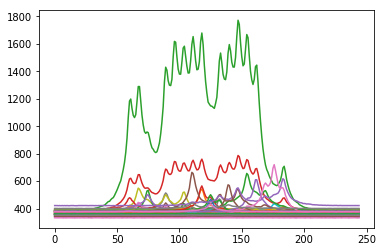

In [33]:
plt.plot(dataslice[0])
plt.show()

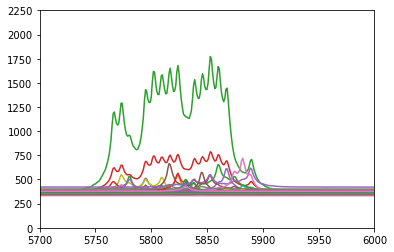

In [31]:
plt.plot(object_file["data"])


plt.axis([5700, 6000, 0, 2250])
#plt.axis([8150, 8400, 0, 2250])
#plt.axis([10350, 10600, 0, 2250])
#plt.axis([12800, 13000, 0, 2250])
#plt.axis([14950, 15200, 0, 2250])
#plt.axis([17400, 17600, 0, 2250])
#plt.axis([19600, 19800, 0, 2250])
plt.show()